In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [26]:
df = pd.read_csv('E:\\Notes\\Statistics\\Feature Engineering\\Datasets\\train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
df.shape

(891, 3)

In [27]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [32]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [29]:
df.head()

X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [31]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [34]:
# Applying Decision Tree Classifier Before Transformations
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.659217877094972

In [35]:
# Cross Validation
np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

np.float64(0.6633208489388264)

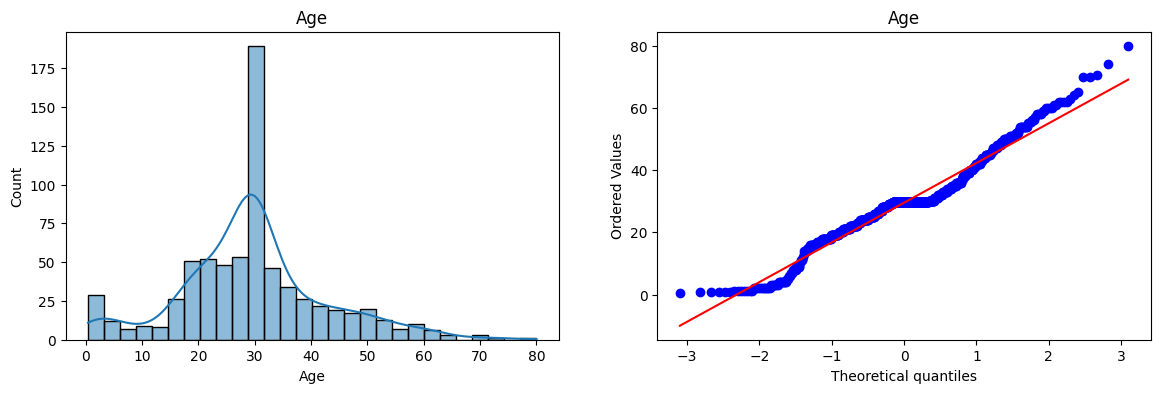

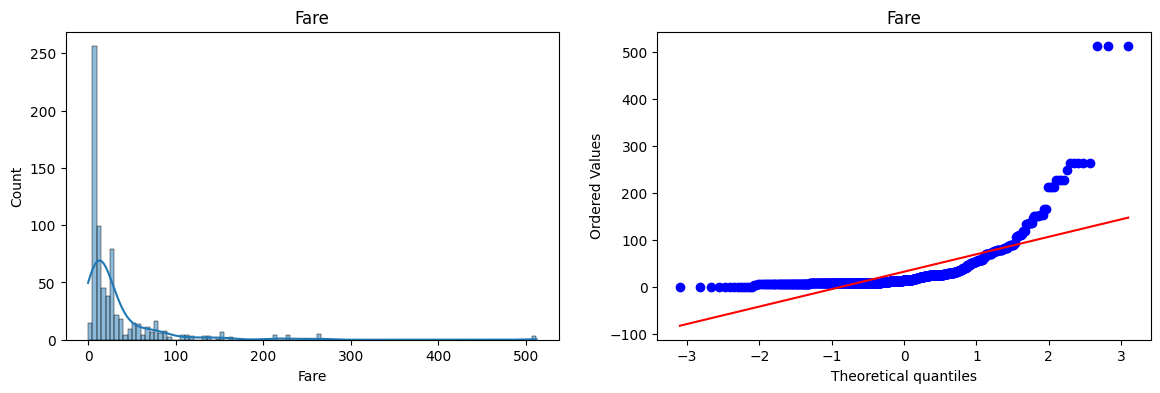

In [37]:
# Data Distribution for each column-

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)

#### **Transforming Data using Discretization Method**

In [ ]:
# Using Quantile (Equal Freq. Binning) 
kbin_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

In [45]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [49]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [50]:
trf.named_transformers_['first'].n_bins_  #Tells no. of bins 

array([5])

In [51]:
trf.named_transformers_['second'].bin_edges_ #Tells the range of each bin

array([array([  0.     ,   7.8542 ,  10.64834,  25.98584,  39.515  , 262.375  ])],
      dtype=object)

In [52]:
# Applying DTC on Transformed Data
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)

y_pred1 = clf.predict(X_test_trf)

accuracy_score(y_test, y_pred1)

0.7039106145251397

In [53]:
# Cross-Validation
X_trf = trf.fit_transform(X)

np.mean(cross_val_score(clf, X_trf, y, cv=10, scoring='accuracy'))

np.float64(0.6746566791510612)

##### **Only 0.01% improvement**

#### **Generalizing Code to test out different methods**

In [69]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf1 = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    X_transform = trf1.fit_transform(X)
    print(np.mean(cross_val_score(clf, X_transform, y, cv=10, scoring='accuracy')))

    # Displaying figure
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X['Age'],kde=True)
    plt.title("Before")

    plt.subplot(122)
    sns.histplot(X_transform[:,0],kde=True)
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X['Fare'], kde=True)
    plt.title("Before")

    plt.subplot(122)
    sns.histplot(X_transform[:,1],kde=True)
    plt.title("Fare")

    plt.show()

0.6914856429463171


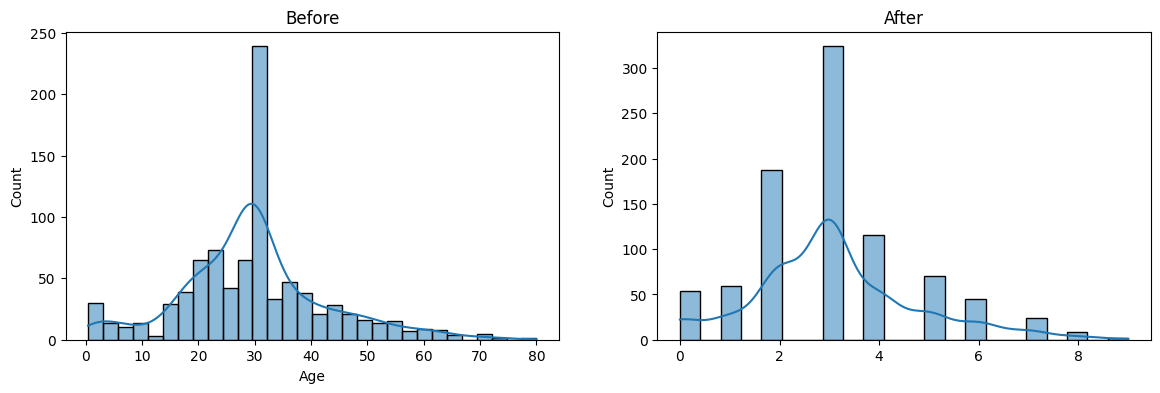

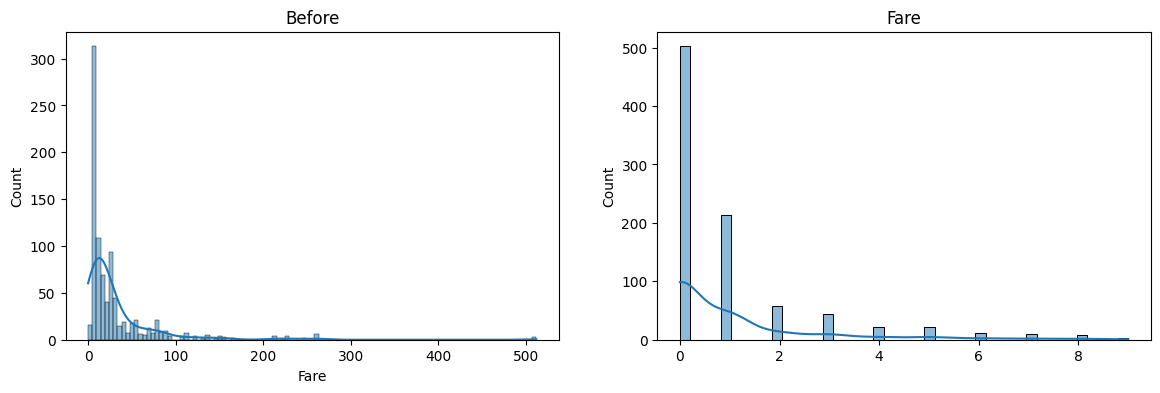

In [70]:
discretize(10, 'kmeans')

0.6959675405742821


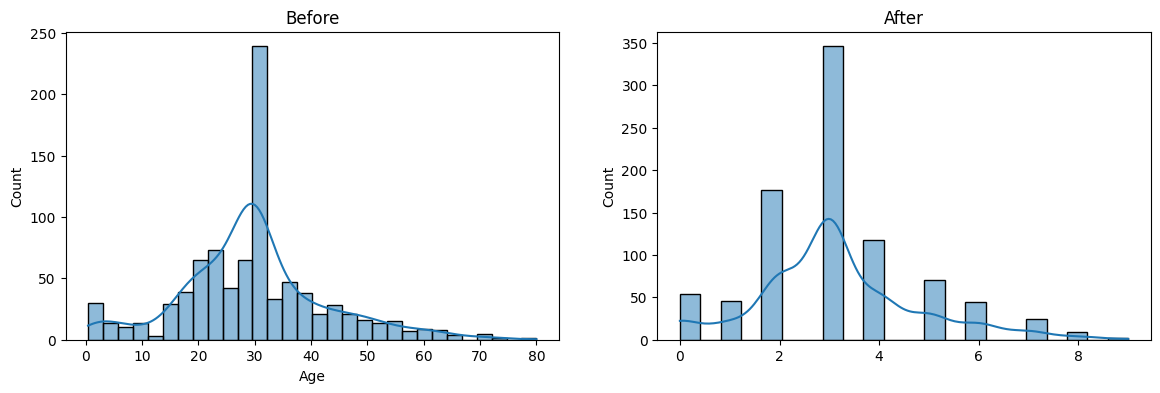

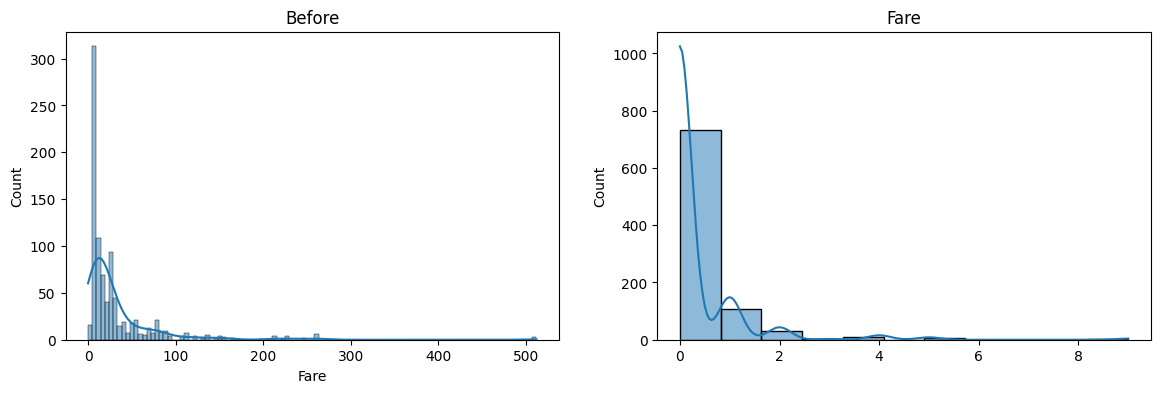

In [71]:
discretize(10, 'uniform')